In [3]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import seaborn as sns



#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier


from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

In [4]:


from collections import Counter , defaultdict


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import TransformerMixin, BaseEstimator


In [5]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [6]:
df = pd.read_csv("train_jqd04QH.csv")
df10 = df.copy()
df.shape

(18359, 14)

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [9]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [10]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")

In [11]:
missing_val = get_percentage_miss_value(df)


Column->  gender , total no of missing value :  4098  & :          22.32  %
Column->  enrolled_university , total no of missing value :  342  & :          1.86  %
Column->  education_level , total no of missing value :  457  & :          2.49  %
Column->  major_discipline , total no of missing value :  2838  & :          15.46  %
Column->  experience , total no of missing value :  59  & :          0.32  %
Column->  company_size , total no of missing value :  4779  & :          26.03  %
Column->  company_type , total no of missing value :  5039  & :          27.45  %
Column->  last_new_job , total no of missing value :  367  & :          2.0  %




There are no Higher Column Missing values in Dataset


In [12]:
def visualize_categorical_values(dataset):
    no_of_columns = 4
    no_of_rows = 4
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,24))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show()   

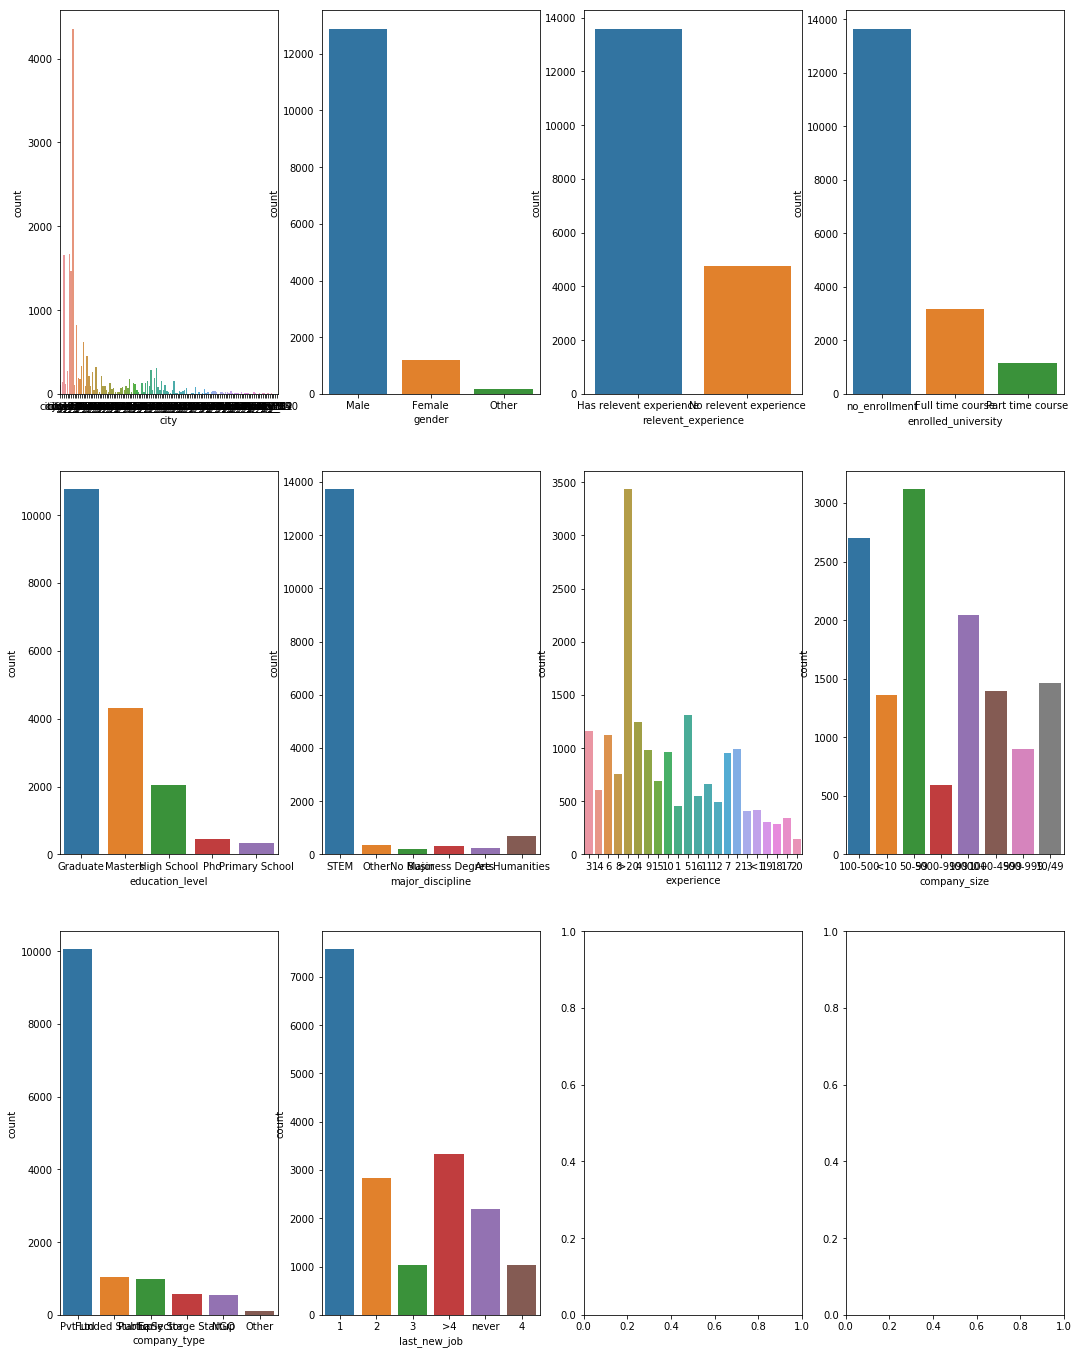

In [13]:
visualize_categorical_values(df)

In [15]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [14]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")

In [47]:
check_cloumn_details_type_categorical(df)

Columns name :   city
{'city_149': 105, 'city_83': 142, 'city_16': 1654, 'city_64': 119, 'city_100': 271, 'city_21': 1672, 'city_114': 1472, 'city_103': 4358, 'city_97': 109, 'city_160': 827, 'city_65': 188, 'city_90': 180, 'city_75': 332, 'city_136': 624, 'city_159': 99, 'city_67': 455, 'city_28': 212, 'city_10': 95, 'city_73': 264, 'city_76': 49, 'city_104': 318, 'city_27': 54, 'city_30': 23, 'city_61': 217, 'city_99': 101, 'city_41': 95, 'city_142': 45, 'city_9': 21, 'city_116': 131, 'city_128': 62, 'city_74': 66, 'city_69': 20, 'city_1': 27, 'city_176': 24, 'city_40': 73, 'city_123': 78, 'city_152': 53, 'city_165': 90, 'city_89': 69, 'city_36': 175, 'city_44': 18, 'city_46': 128, 'city_45': 119, 'city_134': 48, 'city_93': 25, 'city_180': 5, 'city_162': 125, 'city_84': 23, 'city_138': 126, 'city_173': 156, 'city_19': 98, 'city_71': 281, 'city_158': 52, 'city_23': 194, 'city_102': 313, 'city_105': 87, 'city_91': 42, 'city_11': 150, 'city_13': 53, 'city_57': 108, 'city_20': 30, 'city_

In [36]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")

In [37]:
check_cloumn_details_type_numberical(df)

In [38]:
## checking for the missing values : 


round(100*(df.isnull().sum()/len(df.index)),2) [round(100*(df.isnull().sum()/len(df.index)),2).values > 0.00 ].sort_values(ascending = False)


education_level    2.49
last_new_job       2.00
experience         0.32
dtype: float64

In [21]:
## Droping columns which does not provid the relevant information : 

df = df.drop(['company_type','company_size','major_discipline'],axis='columns')


In [27]:
## checking for the missing values : 


round(100*(df.isnull().sum()/len(df.index)),2) [round(100*(df.isnull().sum()/len(df.index)),2).values > 0.00 ].sort_values(ascending = False)


education_level    2.49
last_new_job       2.00
experience         0.32
dtype: float64

In [18]:
# imputing the catagorical variables: 


df.gender.fillna('Male',inplace=True)
df.enrolled_university.fillna('no_enrollment',inplace = True)


In [29]:
df_numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
df_numeric_cols

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [31]:
check_cloumn_details_type_numberical(df)

In [41]:
print(df['city_development_index'].value_counts())

0.920    5185
0.624    1672
0.910    1654
0.926    1472
0.698     655
0.897     624
0.939     544
0.855     455
0.924     318
0.804     313
0.884     281
0.887     271
0.754     264
0.913     217
0.899     194
0.802     188
0.925     178
0.893     175
0.878     156
0.743     152
0.896     150
0.550     150
0.827     148
0.923     142
0.762     128
0.836     126
0.767     125
0.666     119
0.890     119
0.866     108
         ... 
0.725      18
0.640      14
0.739      14
0.448      13
0.745      13
0.898      12
0.742      11
0.921      10
0.493       9
0.775       9
0.788       9
0.701       8
0.735       7
0.680       7
0.516       7
0.730       7
0.780       6
0.563       5
0.693       5
0.645       5
0.556       4
0.518       4
0.512       4
0.824       4
0.807       4
0.487       4
0.649       4
0.781       3
0.625       3
0.664       2
Name: city_development_index, Length: 93, dtype: int64


In [24]:
def check_skewness_numerical(dataset):
    #analysing the distribution of sale price
    print('skew is', dataset.target.skew())   
    plt.hist(dataset['target'], color= 'b')

    plt.title('Distribution of sales price of houses', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('sales price', fontsize = 20)

    plt.show()

skew is 2.1734037375037607


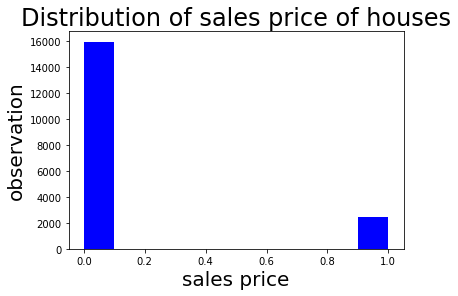

In [25]:
check_skewness_numerical(df)

In [26]:
Counter(df.target)

Counter({0: 15934, 1: 2425})

In [58]:
15934 / len(df)

0.867912195653358

In [59]:
2425 / len(df)

0.13208780434664197

In [60]:
13659 / len(df)

0.7439947709570238

In [14]:
df10.shape

(18359, 14)

In [15]:

df11 = df10.dropna(axis=0)
df11.shape

(9287, 14)

In [16]:
df11.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
5,13342,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0
6,11746,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,23,1


In [17]:
feature_column = ["city_development_index","training_hours"]

In [18]:
Counter(df11.target)

Counter({0: 8296, 1: 991})

In [19]:
# check_cloumn_details_type_categorical(df11)

In [20]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             9287 non-null   int64  
 1   city                    9287 non-null   object 
 2   city_development_index  9287 non-null   float64
 3   gender                  9287 non-null   object 
 4   relevent_experience     9287 non-null   object 
 5   enrolled_university     9287 non-null   object 
 6   education_level         9287 non-null   object 
 7   major_discipline        9287 non-null   object 
 8   experience              9287 non-null   object 
 9   company_size            9287 non-null   object 
 10  company_type            9287 non-null   object 
 11  last_new_job            9287 non-null   object 
 12  training_hours          9287 non-null   int64  
 13  target                  9287 non-null   int64  
dtypes: float64(1), int64(3), object(10)
mem

In [21]:
# X = df11.iloc[:,:-1]





X = df11.loc[:,feature_column]
Y = df11.iloc[:,-1]

In [22]:
# type(Y[0])

In [23]:
X.head(3)

,city_development_index,training_hours
0,0.689,106
1,0.923,69
3,0.666,26


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9287 entries, 0 to 18358
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  9287 non-null   float64
 1   training_hours          9287 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 217.7 KB


In [36]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

    
    

   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 2) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 2) * 100
            

            row = [names[j],   i,   train_acc, test_acc]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    


In [37]:
names_regression = [ "LightGBM", "RF", "XGBoost"]
algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc"]

random_state_list_up_to_10 = [1,2,3]


addRandomStateForAlgorithm(X,Y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

      Model  Random_state  Train_acc  Test_acc
0  LightGBM             1       90.0      89.0
1  LightGBM             2       90.0      89.0
2  LightGBM             3       90.0      89.0
3        RF             1       93.0      87.0
4        RF             2       93.0      86.0
5        RF             3       93.0      87.0
6   XGBoost             1       89.0      89.0
7   XGBoost             2       89.0      89.0
8   XGBoost             3       89.0      89.0


In [29]:
df.shape

(18359, 14)

In [ ]:
model2=rf().fit(x_train,y_train)
pred2=model2.predict(test2)
y_pred2=model2.predict(x_test)

In [ ]:
seg1_df = pd.DataFrame()
seg1_df['id'] = range(1,88)
seg1_df['application_date'] = test1_date.values
seg1_df['segment'] = 1
seg1_df['case_count'] = pred1

seg2_df = pd.DataFrame()
seg2_df['id'] = range(88,181)
seg2_df['application_date'] = test2_date.values
seg2_df['segment'] = 2
seg2_df['case_count'] = pred2

In [ ]:
res_df = pd.concat([seg1_df, seg2_df])
res_df.to_csv('final_submission_3.csv', index=False)

In [ ]:

lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)